# 0: Numerical Tools

# 1. Interpolation

In [1]:
using Interpolations, Plots

In [2]:
xc = range(-1.0, 1.0, length = 5)

-1.0:0.5:1.0

In [3]:
yc = exp.(xc)

5-element Vector{Float64}:
 0.36787944117144233
 0.6065306597126334
 1.0
 1.6487212707001282
 2.718281828459045

In [4]:
xf = range(-1.0, 1.0, length = 2_500)
yf = exp.(xf)

2500-element Vector{Float64}:
 0.36787944117144233
 0.36817398033999926
 0.36846875532853446
 0.36876376632585495
 0.3690590135209189
 0.3693544971028357
 0.36965021726086633
 0.3699461741844232
 0.3702423680630703
 0.3705387990865236
 ⋮
 2.7009334594296113
 2.7030959360630837
 2.7052601440628634
 2.707426084815152
 2.7095937597072624
 2.7117631701276164
 2.7139343174657484
 2.7161072031123044
 2.718281828459045

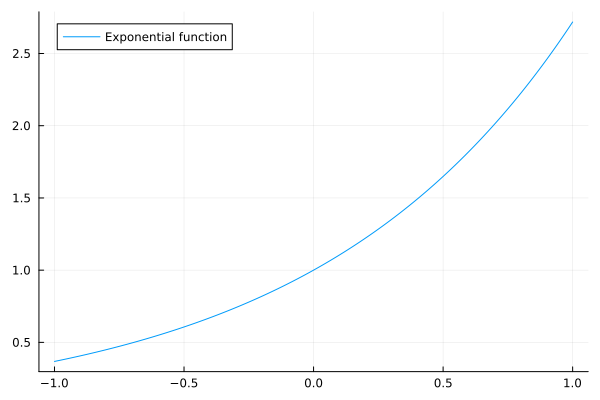

In [5]:
plot(xf, yf, label = "Exponential function")

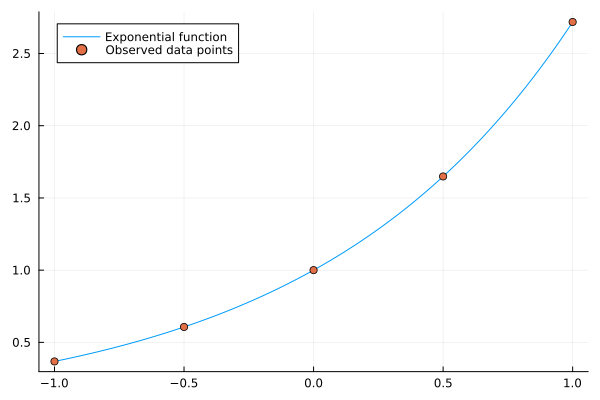

In [6]:
scatter!(xc, yc, label = "Observed data points")

In [7]:
interp_lin = LinearInterpolation(xc, yc)

5-element extrapolate(scale(interpolate(::Vector{Float64}, BSpline(Linear())), (-1.0:0.5:1.0,)), Throw()) with element type Float64:
 0.36787944117144233
 0.6065306597126334
 1.0
 1.6487212707001282
 2.718281828459045

In [ ]:
scatter(xc, yc, label = "Observed data")

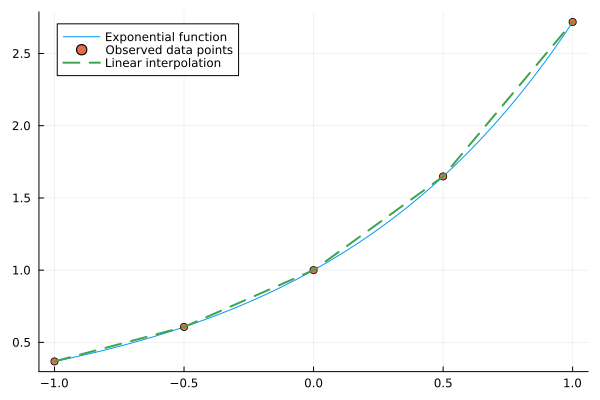

In [8]:
plot!(xf, interp_lin.(xf), label = "Linear interpolation", lw = 2, ls = :dash)

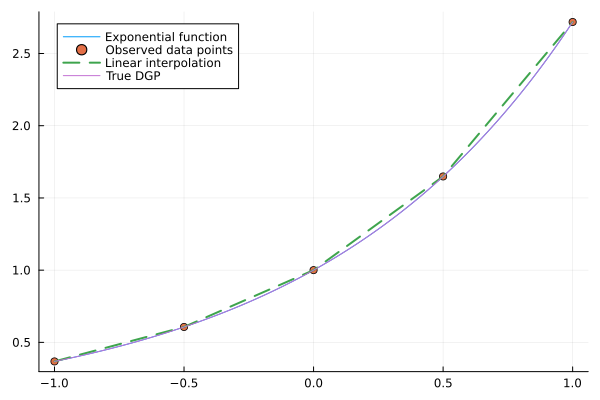

In [9]:
plot!(xf, yf, label = "True DGP")

In [10]:
interp_cubic = CubicSplineInterpolation(xc, yc)

5-element extrapolate(scale(interpolate(OffsetArray(::Vector{Float64}, 0:6), BSpline(Cubic(Line(OnGrid())))), (-1.0:0.5:1.0,)), Throw()) with element type Float64:
 0.36787944117144233
 0.6065306597126333
 0.9999999999999999
 1.648721270700128
 2.718281828459045

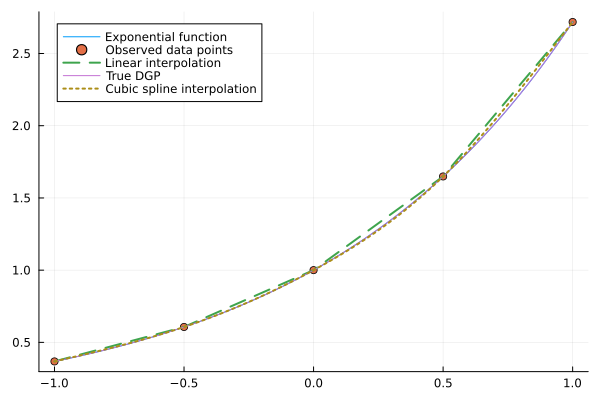

In [11]:
plot!(xf, interp_cubic.(xf), label = "Cubic spline interpolation", lw = 2, ls = :dot)

# 2. Root-finding/Optimization


In [12]:
using Optim
using JuMP
using MadNLP

In [13]:
α  = 0.3;
I  = 10;
pₓ = 2;
pᵥ = 1;

#Declaring the model
model = Model(MadNLP.Optimizer)

#set_silent(model) #if you want to disable printing the output from the solver

@variable(model, x >=0)                   #Introducing all the variables in the system
@variable(model, v >=0)                 
@NLobjective(model, Max, x^α * v^(1-α))   #Declaring the model
@constraint(model, c1, pₓ*x + pᵥ*v <= I)  #Declaring the constraint
#print(model)

c1 : 2 x + v ≤ 10

In [14]:
optimize!(model);                          #Solving the model

This is MadNLP version v0.8.12, running with umfpack

Number of nonzeros in constraint Jacobian............:        2
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        2
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du inf_compl lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -9.9999900e-03 0.00e+00 8.17e-01 9.97e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1 -1.1499338e-01 1.05e-15 6.63e-01 3.91e+00  -1.0 3.12e-

In [15]:
value(x)                                  #The x that solves the maximization problem             

1.5000000152846718

In [16]:
value(v)                                  #The v that solves the maximization problem

7.000000063738626

In [17]:
using NonlinearSolve
using BenchmarkTools

In [21]:
function f(du, u, p)
    x, y, = u
    du[1] = 2 - y - 3 * x
    du[2] = x^2 + y^2 - 16
end

u0 = [1.0, 1.0]

prob = NonlinearProblem(f, u0)

solve(prob, NewtonRaphson())

retcode: Success
u: 2-element Vector{Float64}:
 -0.6489995996796797
  3.946998799039039

In [20]:
using StaticArrays

f_SA(u, p) = SA[2 - u[2] - 3 * u[1], u[1]^2 + u[2]^2 - 16]
u0 = SA[1.0, 1.0] #Corresponds to the initial guess
prob = NonlinearProblem(f_SA, u0)

@benchmark solve(prob, SimpleNewtonRaphson())

BenchmarkTools.Trial: 10000 samples with 992 evaluations per sample.
 Range (min … max):  36.207 ns …  5.689 μs  ┊ GC (min … max): 0.00% … 98.73%
 Time  (median):     37.383 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   42.388 ns ± 86.011 ns  ┊ GC (mean ± σ):  6.60% ±  4.06%

  ▆██▆▂▁ ▂▄▅▆▅▄▄▃▂▂▂▃▂▁▁ ▁ ▁▁  ▁  ▁                           ▂
  ███████████████████████████████████████▇▆█▇▇▇▇▅▅▆▅▆▆▅▆▅▆▅▅▅ █
  36.2 ns      Histogram: log(frequency) by time      57.9 ns <

 Memory estimate: 80 bytes, allocs estimate: 1.

# 3. Numerical integration

In [ ]:
using FastGaussQuadrature, LinearAlgebra

In [ ]:
x,w = gausslegendre(3)

In [ ]:
f(x) = x^4
dot(w, f.(x))